<a target="_blank" href="https://colab.research.google.com/github/yajuna/crafting_math/blob/master/PredictIrishSongs.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

This notebook is modified from the Google colab notebook for NLP. You can find a playlist of videos on NLP here: 
https://www.youtube.com/playlist?list=PLQY2H8rRoyvzDbLUZkbudP-MFQZwNmU4S

The original notebook is linked under the Part 6 video (Training an AI to create poetry).


In [24]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Download and install required packages for data

In [25]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import library and download data from Kaggle. Here we use the 21 pilots songs for lyrics prediction NLP at 

https://www.kaggle.com/datasets/cosmosankur/21-pilots-songs-for-lyrics-prediction-nlp

For datasets on Kaggle, you will need a token from Kaggle, via My Profile--> Account--> API-->Create New Token

In [26]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/cosmosankur/21-pilots-songs-for-lyrics-prediction-nlp")

Skipping, found downloaded files in "./21-pilots-songs-for-lyrics-prediction-nlp" (use force=True to force download)


Obtain data for predictions

In [27]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/learning-datasets/irish-lyrics-eof.txt \
#     -O /tmp/irish-lyrics-eof.txt

In [28]:
tokenizer = Tokenizer()

# read irish lyrics for song prediction
# data = open('/tmp/irish-lyrics-eof.txt').read()

data = open('/content/21-pilots-songs-for-lyrics-prediction-nlp/21pilots.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


{'i': 1, 'to': 2, 'my': 3, 'the': 4, 'you': 5, 'a': 6, "i'm": 7, 'and': 8, 'know': 9, 'it': 10, 'me': 11, 'but': 12, 'oh': 13, 'on': 14, 'that': 15, 'of': 16, 'is': 17, 'in': 18, "don't": 19, 'we': 20, 'for': 21, 'be': 22, 'they': 23, 'when': 24, 'will': 25, 'take': 26, 'all': 27, "it's": 28, 'ah': 29, 'no': 30, 'this': 31, 'time': 32, 'now': 33, "i've": 34, "i'll": 35, 'na': 36, 'with': 37, 'our': 38, 'just': 39, 'out': 40, 'have': 41, 'what': 42, 'been': 43, 'let': 44, 'think': 45, 'if': 46, 'used': 47, 'so': 48, 'sleep': 49, 'much': 50, "you're": 51, 'would': 52, 'one': 53, 'are': 54, 'your': 55, 'back': 56, 'yeah': 57, 'could': 58, 'need': 59, 'trying': 60, 'jumpsuit': 61, 'where': 62, 'wish': 63, 'good': 64, 'about': 65, 'too': 66, 'thinking': 67, 'beat': 68, 'can': 69, 'make': 70, 'at': 71, 'up': 72, 'ever': 73, 'pretend': 74, 'way': 75, 'want': 76, 'alive': 77, 'play': 78, 'not': 79, 'forget': 80, 'than': 81, 'sang': 82, 'old': 83, 'us': 84, 'say': 85, "can't": 86, "we're": 87, 

In [29]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [30]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['stressed'])

18
4
615
16
53
93


In [31]:
print(xs[6])

[  0   0   0   0   0   0   0   1  63   1 175 145 146 449]


In [32]:
print(ys[6])

[0. 0. 0. ... 0. 0. 0.]


In [33]:
print(xs[5])
print(ys[5])

[  0   0   0   0   0   0   0   0   1  63   1 175 145 146]
[0. 0. 0. ... 0. 0. 0.]


In [34]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=100, verbose=1)
#print model.summary()
print(model)


Epoch 1/100
204/204 [==============================] - 18s 57ms/step - loss: 5.4021 - accuracy: 0.1052
Epoch 2/100
204/204 [==============================] - 2s 9ms/step - loss: 3.2044 - accuracy: 0.4231
Epoch 3/100
204/204 [==============================] - 2s 8ms/step - loss: 1.9448 - accuracy: 0.5938
Epoch 4/100
204/204 [==============================] - 1s 6ms/step - loss: 1.2738 - accuracy: 0.6965
Epoch 5/100
204/204 [==============================] - 2s 8ms/step - loss: 0.8730 - accuracy: 0.7837
Epoch 6/100
204/204 [==============================] - 2s 9ms/step - loss: 0.6619 - accuracy: 0.8315
Epoch 7/100
204/204 [==============================] - 3s 16ms/step - loss: 0.5524 - accuracy: 0.8536
Epoch 8/100
204/204 [==============================] - 2s 9ms/step - loss: 0.5035 - accuracy: 0.8626
Epoch 9/100
204/204 [==============================] - 1s 7ms/step - loss: 0.4746 - accuracy: 0.8670
Epoch 10/100
204/204 [==============================] - 1s 7ms/step - loss: 0.4470 - acc

In [35]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

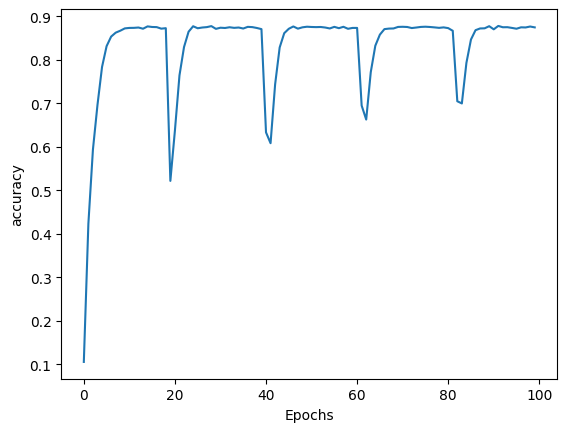

In [36]:
plot_graphs(history, 'accuracy')


In [37]:
seed_text = "Can't stop thinking about if and when I'd die"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 37ms/step
Can't stop thinking about if and when I'd die for you won't forget about my hands yeah this this far kid moves my mind could find i'm all i guess i'll sleep when i'm dead only different this this this time change this one song this this a is believe the sound we this is a violent island was all battling fear i have i have my taxes to take this time on this house with pieces of me i was fought it far time to say this song this like my lungs will range would have these thoughts you no no no no one really mattered the play
